In [10]:
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

In [11]:
# Función para generar la campana de Gauss
def gaussian(x, mean, std_dev):
    return np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2)) / (std_dev * np.sqrt(2 * np.pi))

In [12]:
# Función de aptitud basada en la métrica de Wasserstein
def fitness(individual, target_distribution):
    return 1 / (wasserstein_distance(individual, target_distribution))

In [13]:
# Función de inicialización de la población
def initialize_population(population_size, genome_size):
    return np.random.rand(population_size, genome_size)

In [14]:
# Cruce de dos individuos (puede implementar otros métodos de cruce)
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

In [15]:
# Mutación de un individuo
def mutate(individual, mutation_rate):
    mask = np.random.rand(len(individual)) < mutation_rate
    individual[mask] = np.random.rand(sum(mask))
    return individual

In [16]:
# Algoritmo genético
def genetic_algorithm(target_distribution, population_size=50, generations=100, mutation_rate=0.1):
    genome_size = len(target_distribution)
    population = initialize_population(population_size, genome_size)

    for generation in range(generations):
        # Calcular la aptitud de cada individuo en la población
        fitness_values = np.array([fitness(individual, target_distribution) for individual in population])

        # Seleccionar los dos mejores individuos
        selected_indices = np.argsort(fitness_values)[-2:]
        parents = population[selected_indices]

        # Cruzar y mutar para obtener nuevos individuos
        children = [mutate(child, mutation_rate) for child in crossover(*parents)]

        # Reemplazar los dos peores individuos en la población con los nuevos individuos
        worst_indices = np.argsort(fitness_values)[:2]
        population[worst_indices] = children

        # Imprimir la aptitud del mejor individuo en esta generación
        best_fitness = np.max(fitness_values)
        print(f"Generación {generation + 1}, Mejor Aptitud: {best_fitness}")

    # Devolver el mejor individuo al final del algoritmo
    best_index = np.argmax(fitness_values)
    best_individual = population[best_index]
    
    return best_individual

Distribución Objetivo: [0.00443185 0.00530579 0.00632878 0.00752133 0.00890582 0.0105065
 0.01234943 0.01446241 0.01687483 0.01961746 0.02272223 0.02622189
 0.03014961 0.03453857 0.03942137 0.0448295  0.05079264 0.05733801
 0.06448952 0.07226707 0.08068571 0.08975477 0.09947714 0.10984842
 0.12085626 0.13247967 0.14468855 0.15744319 0.17069405 0.18438164
 0.1984366  0.21277993 0.22732351 0.24197072 0.2566174  0.27115285
 0.28546117 0.29942268 0.31291556 0.3258175  0.33800759 0.34936814
 0.35978656 0.36915722 0.37738323 0.38437808 0.3900672  0.39438923
 0.39729716 0.39875915 0.39875915 0.39729716 0.39438923 0.3900672
 0.38437808 0.37738323 0.36915722 0.35978656 0.34936814 0.33800759
 0.3258175  0.31291556 0.29942268 0.28546117 0.27115285 0.2566174
 0.24197072 0.22732351 0.21277993 0.1984366  0.18438164 0.17069405
 0.15744319 0.14468855 0.13247967 0.12085626 0.10984842 0.09947714
 0.08975477 0.08068571 0.07226707 0.06448952 0.05733801 0.05079264
 0.0448295  0.03942137 0.03453857 0.030149

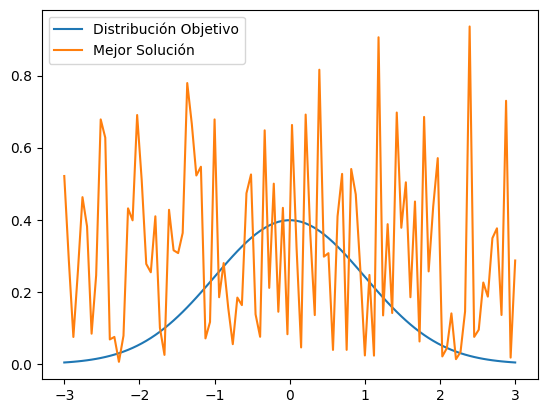

In [17]:
# Parámetros de la campana de Gauss deseada
mean = 0
std_dev = 1
target_distribution = gaussian(np.linspace(-3, 3, 100), mean, std_dev)
print("Distribución Objetivo:", target_distribution)

# Ejecutar el algoritmo genético
best_solution = genetic_algorithm(target_distribution)
print("Mejor Solución:", best_solution)
# Graficar la campana de Gauss deseada y la mejor solución encontrada
plt.plot(np.linspace(-3, 3, 100), target_distribution, label="Distribución Objetivo")
plt.plot(np.linspace(-3, 3, 100), best_solution, label="Mejor Solución")
plt.legend()
plt.show()